# Antes de empezar:

    Lee el archivo README.md
    Comenta todo lo que puedas y utiliza los recursos (archivo README.md)
    ¡Feliz aprendizaje!

En este ejercicio, generaremos números aleatorios a partir de las disribuciones continuas que aprendimos en la lección. Hay dos formas de generar números aleatorios:

1. Usando la librería numpy 
1. Usando la librería Scipy 

Utiliza cualquiera de las dos librerías o ambas en este ejercicio.

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy.stats import uniform, norm


## Distribución Uniforme

Para generar números aleatorios uniformes entre dos valores dados usando scipy, podemos usar el siguiente código o el código que hemos
discutido en clase:

In [22]:
low = 10  # valor mínimo
high = 20  # valor máximo
size = 1000  # cantidad de números aleatorios a generar
random_numbers = uniform.rvs(loc=low, scale=high - low, size=size)
random_numbers

array([17.35451368, 13.87491503, 15.53728898, 15.64549106, 16.79213543,
       11.61811887, 10.57191135, 15.69186962, 16.52393276, 11.66522889,
       14.22206158, 19.91249658, 15.17655624, 14.81057327, 10.15281987,
       12.18140225, 19.27228468, 17.98813354, 10.32072964, 11.12138857,
       16.76162144, 11.08121857, 14.66733514, 10.59006892, 17.17225414,
       16.90328894, 10.45738634, 18.71815805, 10.1746955 , 12.31342796,
       11.68882405, 14.24626853, 10.7748026 , 16.12509372, 14.21661762,
       11.95905251, 10.12261249, 14.7633834 , 13.71446894, 19.58847797,
       11.78225603, 10.80032358, 17.43182507, 14.345581  , 11.88236658,
       12.81694954, 12.48620063, 18.16455621, 17.9424321 , 14.73631776,
       16.2355808 , 10.87974745, 11.83894657, 17.41554371, 10.39818661,
       10.76961573, 16.4565861 , 12.73181308, 12.77069083, 14.93395796,
       17.76141401, 16.92560942, 10.64617718, 16.48688446, 16.86519863,
       10.62945486, 14.99241838, 18.88053382, 13.68238493, 17.14

**Tarea:**

1. Basándote en el código anterior, escribe una función que genere números aleatorios uniformemente distribuidos. Hay varios requisitos para tu función:
    * Debe aceptar 3 parámetros: 
        * `bottom` - el límite inferior de los números generados
        * `ceiling` - el límite superior de los números generados
        * `count` - cuántos números generar
    * Debe devolver una matriz de números aleatorios distribuidos uniformemente

2. Llama a tu función con 2 conjuntos de parámetros a continuación:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

3. Traza las distribuciones uniformes generadas anteriormente utilizando histogramas, donde el eje x es el valor y el eje y es el recuento. Que el número de intervalos del histograma sea 10.

El resultado debe ser como el siguiente:

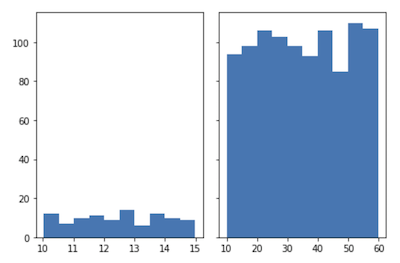

In [23]:
def generar_numeros_aleatorios_uniforme(bottom, ceiling, count):
  return uniform.rvs(loc=bottom, scale=ceiling - bottom, size=count)

In [24]:
matriz1 = generar_numeros_aleatorios_uniforme(10, 15, 100)
matriz2 = generar_numeros_aleatorios_uniforme(10, 60, 1000)

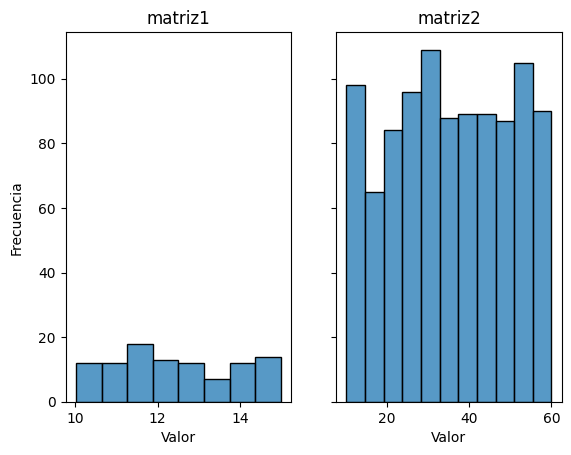

In [25]:
fig, ax = plt.subplots(1,2, sharey=True)

# Histograma matriz1
sns.histplot(matriz1, ax=ax[0])
ax[0].set_title('matriz1')
ax[0].set_xlabel('Valor')
ax[0].set_ylabel('Frecuencia')

# Histograma matriz2
sns.histplot(matriz2, ax=ax[1])
ax[1].set_title('matriz2')
ax[1].set_xlabel('Valor')

plt.show()

How are the two distributions different?

Las distribuciones son muy parecidas y uniformes. La matriz dos tiene mas valores y en un rango mas amplio, pero lo que se refiere a la distribución és la misma.

## Distribución Normal

1. De la misma manera en el reto de Distribución Uniforme, escriba una función que genere números aleatorios distribuidos normalmente.
1. Genera 1.000 números distribuidos normalmente con media de 10 y desviación típica de 1
1. Genera 1.000 números distribuidos normalmente con una media de 10 y una desviación típica de 50
2. Representa gráficamente las distribuciones de los datos generados.

Resultado esperado:

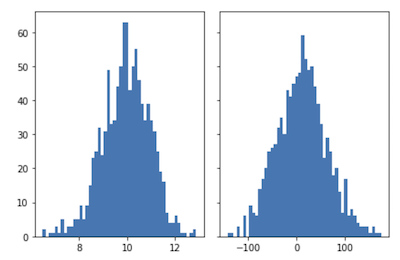

In [26]:
def generar_numeros_aleatorios_normal(media, std, count):
  return norm.rvs(loc=media, scale=std, size=count)

In [27]:
matriz3 = generar_numeros_aleatorios_normal(10, 1, 1000)
matriz4 = generar_numeros_aleatorios_normal(10, 50, 1000)

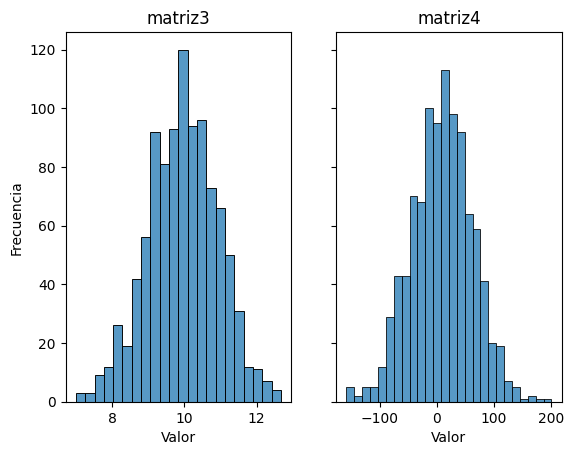

In [46]:
fig, ax = plt.subplots(1, 2, sharey=True)

# Histograma matriz3
sns.histplot(matriz3, ax=ax[0])
ax[0].set_title('matriz3')
ax[0].set_xlabel('Valor')
ax[0].set_ylabel('Frecuencia')

# Histograma matriz4
sns.histplot(matriz4, ax=ax[1])
ax[1].set_title('matriz4')
ax[1].set_xlabel('Valor')

plt.show()

How are the two distributions different?

La distribnución de ambas matrices es la misma (normal). En la primera el rango de valores es más pequeño, mientras que la segunda muestra una variación de valores mucho mayor.

## Distribución Normal de Datos Reales

En este reto vamos a echar un vistazo a los datos reales. Utilizaremos el archivo vehicles.csv para este ejercicio

In [49]:
df = pd.read_csv('./vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Primero importa vehicles.csv.
A continuación, traza los histogramas de las siguientes variables:

1. Barriles de combustible/año

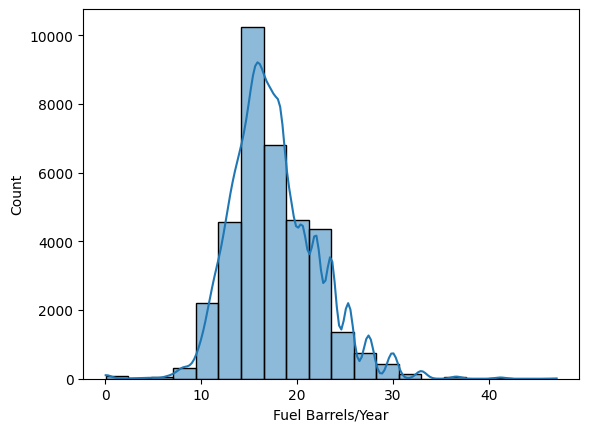

In [64]:
plt.subplot()

sns.histplot(df['Fuel Barrels/Year'], kde=True, bins=20)

plt.show()

2. Emisiones de CO2 Gramos/Milla 

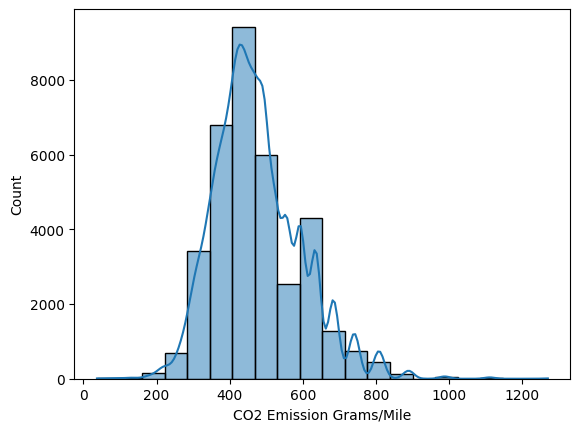

In [63]:
plt.subplot()

sns.histplot(df['CO2 Emission Grams/Mile'], kde=True, bins=20)

plt.show()

3. MPG combinado

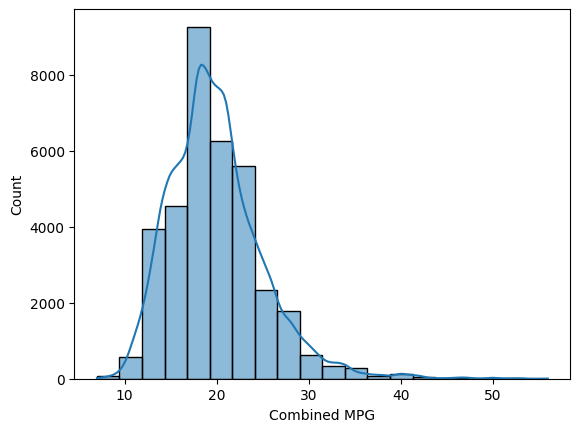

In [61]:
plt.subplot()

sns.histplot(df['Combined MPG'], kde=True, bins=20)

plt.show()

¿Cuál o cuáles de las variables tienen una distribución casi normal? ¿Cómo lo sabes?

Las tres variables estudiadas muestran una distribución casi normal, como se puede observar con la curva kde.

## Distribución Exponencial

1. Utilizando `numpy.random.exponential`, crea una función que devuelva una lista de números distribuidos exponencialmente con la media de 10. 

1. Utiliza la función para generar dos secuencias de números de tamaño 10 y 100.

1. 2. Traza las distribuciones como histogramas con el número de bins como 100.

El resultado debe ser como el siguiente:

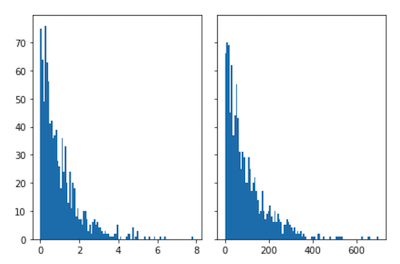

In [65]:
def generar_numeros_aleatorios_exponencial(media, count):
  return np.random.exponential(media, count)

In [66]:
matriz5 = generar_numeros_aleatorios_exponencial(10, 10)
matriz6 = generar_numeros_aleatorios_exponencial(10, 100)

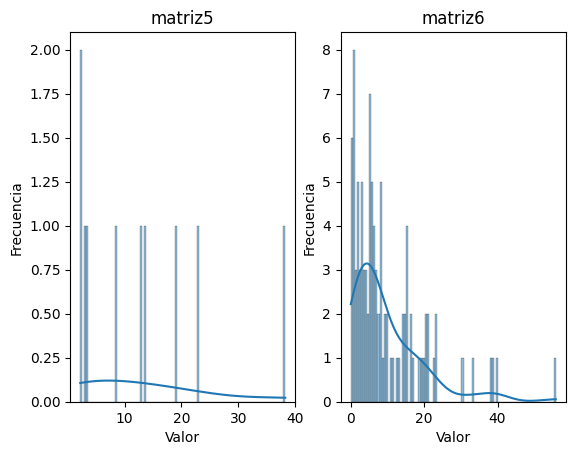

In [67]:
fig, ax = plt.subplots(1, 2)

# Histograma matriz5
sns.histplot(matriz5, bins=100, kde=True, ax=ax[0])
ax[0].set_title('matriz5')
ax[0].set_xlabel('Valor')
ax[0].set_ylabel('Frecuencia')

# Histograma matriz6
sns.histplot(matriz6, bins=100, kde=True, ax=ax[1])
ax[1].set_title('matriz6')
ax[1].set_xlabel('Valor')
ax[1].set_ylabel('Frecuencia')

plt.show()

¿En qué se diferencian ambas distribuciones?

La primera tiene muchos menos valores, por lo que la distribución no parece exponencial, mientras que la segunda al tener mas valores ya muestra una distribución exponencial.

## Distribución Exponencial de datos reales

Supongamos que el tiempo que uno pasa en un banco se distribuye exponencialmente con media de 10 minutos (es decir, λ = 1/10). ¿Cuál es la probabilidad de que un cliente pase menos de quince minutos en el banco? 

Escribe un código en python para resolver este problema

In [77]:
λ = 1/10
t = 15

$P(X < 15) = 1 - e^{-\lambda \cdot t}$

In [78]:
probabilidad = 1 - math.exp(-λ * t)
print(f"{probabilidad*100:.2f}%")

77.69%


¿Cuál es la probabilidad de que el cliente pase más de 15 minutos?

$P(X > 15) = e^{-\lambda \cdot t}$

In [79]:
probabilidad_mas_15 = math.exp(-λ * t)
print(f"{probabilidad_mas_15*100:.2f}%")

22.31%
